1. Download and import the dataset splits.

In [19]:
import pandas as pd

train_df = pd.read_csv('Data/train.tsv', sep='\t')
test_df = pd.read_csv('Data/test.tsv', sep='\t')

2. Clean both splits from missing information (e.g., missing user ID or item ID) and duplicates (cases where the same user has rated the same item multiple times) if any.

In [20]:
print("Train dataset's length before cleaning: ", len(train_df))
print("Test dataset's length before cleaning: ", len(test_df))

# Remove rows with missing user_id, item_id or rating
train_df = train_df.dropna(subset=['user_id', 'item_id', 'rating'])
test_df = test_df.dropna(subset=['user_id', 'item_id', 'rating'])

print("Train dataset's length after removing null values: ", len(train_df))
print("Test dataset's length after removing null values: ", len(test_df))

# Remove duplicate ratings from the same user for the same item
train_df = train_df.drop_duplicates(subset=['user_id', 'item_id'])
test_df = test_df.drop_duplicates(subset=['user_id', 'item_id'])

print("Train dataset's length after removing duplicates: ", len(train_df))
print("Test dataset's length after removing duplicates: ", len(test_df))

Train dataset's length before cleaning:  11000
Test dataset's length before cleaning:  3000
Train dataset's length after removing null values:  11000
Test dataset's length after removing null values:  3000
Train dataset's length after removing duplicates:  9913
Test dataset's length after removing duplicates:  1822


3. Double check that all users from the test split also appear in the training set, and remove those that do not appear in training.

In [21]:
# Filter test_df to include only rows with user_id present in train_df
test_df = test_df[test_df['user_id'].isin(train_df['user_id'])]
print("Test dataset's length after filtering:", len(test_df))

Test dataset's length after filtering: 1822


4. Compute user and item statistics (such as distribution of ratings per user/item) for the training set train.tsv and write a discussion; does the dataset have important properties that should be taken into account or that may mislead the evaluation?

Ratings per user:
count    800.000000
mean      12.391250
std        5.737973
min        1.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       48.000000
dtype: float64

Ratings per item:
count    509.000000
mean      19.475442
std       19.145883
min        1.000000
25%       10.000000
50%       14.000000
75%       21.000000
max      158.000000
dtype: float64

Overall rating distribution:
rating
1.0     231
2.0     252
3.0     635
4.0    1689
5.0    7106
Name: count, dtype: int64



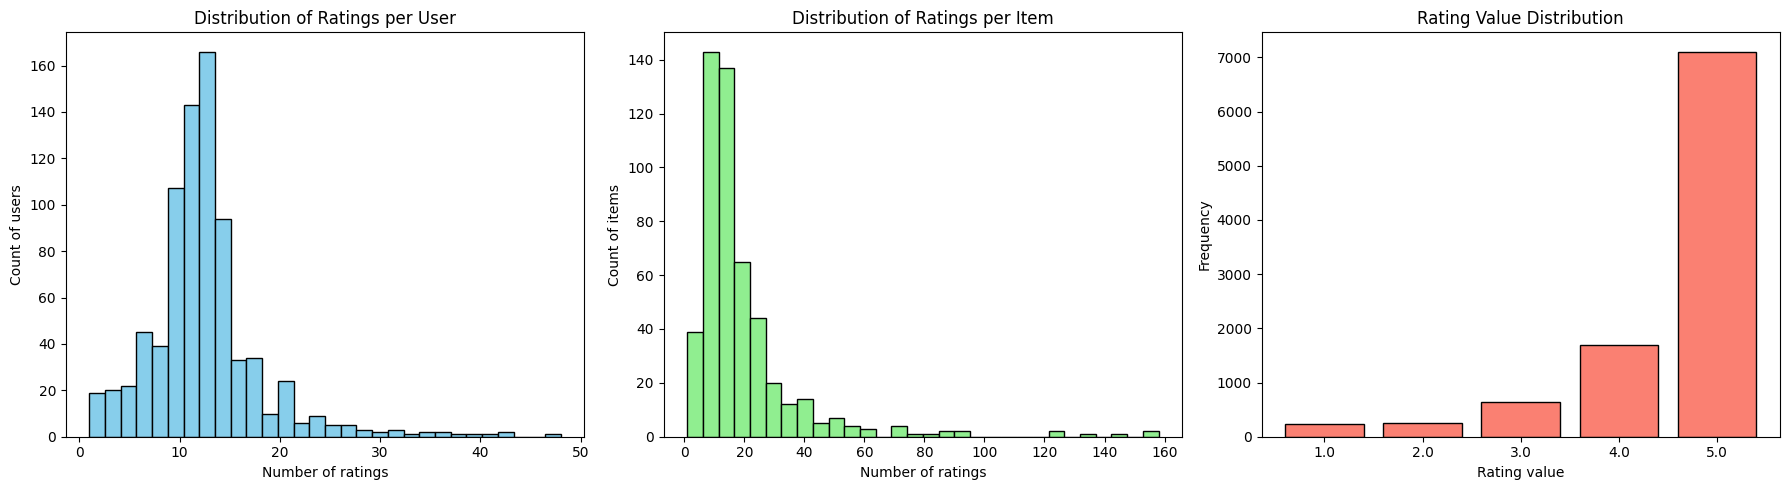

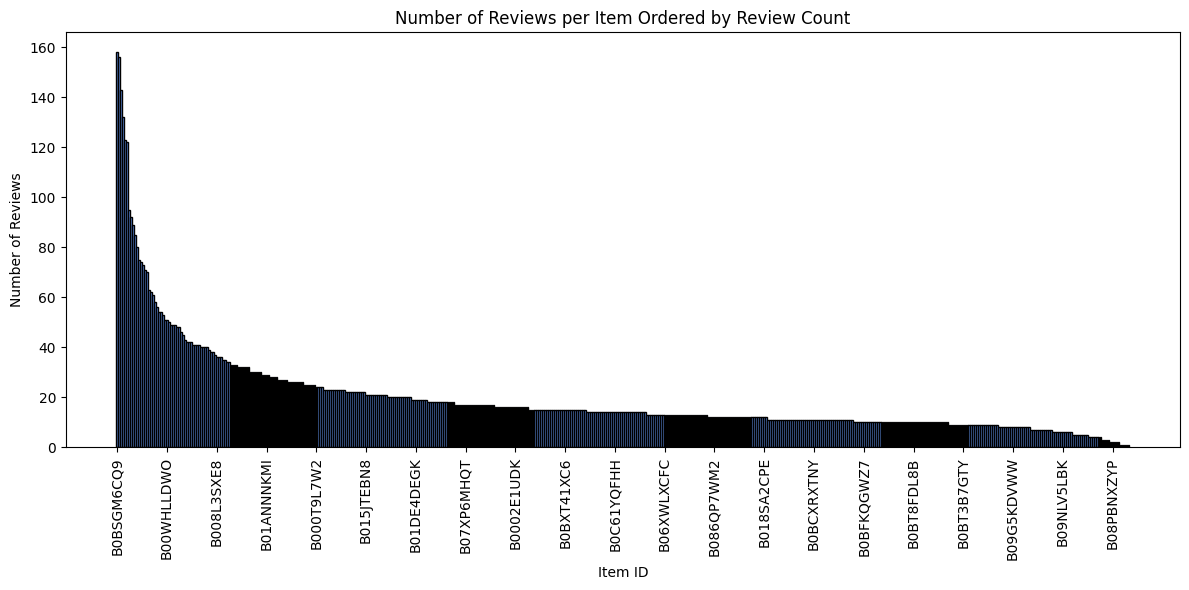

In [22]:
import numpy as np

# Compute statistics for train_df

# 1. Ratings per user
user_rating_counts = train_df.groupby("user_id").size()
print("Ratings per user:")
print(user_rating_counts.describe())
print()

# 2. Ratings per item
item_rating_counts = train_df.groupby("item_id").size()
print("Ratings per item:")
print(item_rating_counts.describe())
print()

# 3. Distribution of rating values
rating_distribution = train_df["rating"].value_counts().sort_index()
print("Overall rating distribution:")
print(rating_distribution)
print()

# Optional: Plot histograms for better visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(user_rating_counts, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Distribution of Ratings per User")
axes[0].set_xlabel("Number of ratings")
axes[0].set_ylabel("Count of users")

axes[1].hist(item_rating_counts, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title("Distribution of Ratings per Item")
axes[1].set_xlabel("Number of ratings")
axes[1].set_ylabel("Count of items")

axes[2].bar(rating_distribution.index.astype(str), rating_distribution.values, color='salmon', edgecolor='black')
axes[2].set_title("Rating Value Distribution")
axes[2].set_xlabel("Rating value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot number of reviews for each item ordered by review count with reduced x-axis labels

sorted_item_counts = item_rating_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bar_positions = np.arange(len(sorted_item_counts))
plt.bar(bar_positions, sorted_item_counts.values, color='cornflowerblue', edgecolor='black')
plt.xlabel("Item ID")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Item Ordered by Review Count")

# Set x-ticks to display only a subset of labels (e.g., about 20 labels)
step = max(1, len(sorted_item_counts) // 20)
plt.xticks(bar_positions[::step], sorted_item_counts.index[::step].astype(str), rotation=90)

plt.tight_layout()
plt.show()

5. Compute the frequency of items that were rated highly, i.e., rating ≥ 3. Count how many times each musical instrument was highly rated. We will use this as the TopPop recommender system in Week 7. Report in a table the top 5 most highly rated items with the number of rates and average rate.

In [23]:
# Filter train_df for ratings greater than or equal to 3
high_rated = train_df[train_df['rating'] >= 3]

# Count number of high ratings and compute average rating per item
item_stats = high_rated.groupby('item_id').agg(
    high_rates_count=('rating', 'count'),
    avg_high_rate=('rating', 'mean')
)

# Sort items by number of high ratings in descending order and select top 5
top5 = item_stats.sort_values(by='high_rates_count', ascending=False).head(5)

print("Top 5 Most Highly Rated Items:")
print(top5)

Top 5 Most Highly Rated Items:
            high_rates_count  avg_high_rate
item_id                                    
B0BSGM6CQ9               153       4.784314
B0BPJ4Q6FJ               153       4.803922
B09857JRP2               141       4.808511
B0BCK6L7S5               120       4.583333
B0BTC9YJ2W               119       4.815126
